In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/selected_features_on_spambase.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_original,word_freq_re,word_freq_edu,char_freq_%28,char_freq_%21,char_freq_%24,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000,0.778,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.00,0.00,0.132,0.372,0.180,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.12,0.06,0.06,0.143,0.276,0.184,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.00,0.00,0.137,0.137,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.00,0.00,0.135,0.135,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.31,0.31,0.232,0.000,0.000,1.142,3,88,0
4206,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.00,0.000,0.353,0.000,1.555,4,14,0
4207,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.20,0.718,0.000,0.000,1.404,6,118,0
4208,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.32,0.057,0.000,0.000,1.147,5,78,0


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier

In [3]:
x = df.drop('class', axis=1)
y = df['class']

In [4]:
x_scaled = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)
LR = LogisticRegression().fit(x_train, y_train)
print('Accuracy (Logistic-Regression):', metrics.accuracy_score(y_test, LR.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, LR.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, LR.predict(x_test)))

Accuracy (Logistic-Regression): 0.9192399049881235

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       760
           1       0.93      0.87      0.90       503

    accuracy                           0.92      1263
   macro avg       0.92      0.91      0.91      1263
weighted avg       0.92      0.92      0.92      1263


Confusion Matrix:
 [[725  35]
 [ 67 436]]


Overall Accuracy: 91.9%
Out of 1,263 total emails, 1,162 were correctly classified. 

Precision: When the model predicts spam, it's right 93% of the time.

Recall: It catches 87% of the actual spam emails.

F1-Score: Balanced performance between precision and recall.

725 legitimate emails correctly identified.

436 spam emails correctly identified.

67 spam emails were missed (false negatives).

35 legitimate emails wrongly flagged as spam (false positives).

In [5]:
model = sm.Logit(y_train, sm.add_constant(x_train))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.208501
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 2947
Model:                          Logit   Df Residuals:                     2901
Method:                           MLE   Df Model:                           45
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                  0.6900
Time:                        09:04:41   Log-Likelihood:                -614.45
converged:                       True   LL-Null:                       -1982.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5619      1.713     -4.999      0.000     -11.919      -5.205
x1            -0.0116      0

- The model does a great job distinguishing spam emails from legitimate ones, explaining about 70% of the variation in the data.

- Certain keywords like “remove,” “free,” “addresses,” and the dollar sign “$” strongly indicate spam emails.

- Some words, like “george” and “hp,” are usually found in legitimate emails and help the model identify non-spam.

- The model was able to perfectly classify about 28% of the emails, which means it’s very confident for many cases.

- Overall, this model provides clear insights into which features help predict spam, and it’s a solid foundation for further improvements and comparisons with other models.



In [6]:
SVC = SVC(kernel='poly')
SVC.fit(x_train, y_train)
print('Accuracy (Support Vector Machine): ', metrics.accuracy_score(y_test, SVC.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, SVC.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, SVC.predict(x_test)))

Accuracy (Support Vector Machine):  0.779889152810768

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       760
           1       0.94      0.48      0.63       503

    accuracy                           0.78      1263
   macro avg       0.84      0.73      0.74      1263
weighted avg       0.82      0.78      0.76      1263


Confusion Matrix:
 [[745  15]
 [263 240]]


So, I tested a Support Vector Machine (SVM) on the dataset. The overall accuracy was about 77.99%, which isn’t bad, but let’s break it down further.

The model does a great job identifying non-spam emails (class 0) — it caught 745 out of 760 correctly, which explains the very high recall of 0.98 for that class.

But when it comes to detecting spam (class 1), it’s struggling. The recall is only 0.48, which means it's missing more than half of the actual spam emails.

On the other hand, its precision for spam is quite high (0.94) — so when it does predict something as spam, it's usually right. But it's just not catching enough of them.

The confusion matrix also shows this imbalance — a lot of spam emails are being misclassified as non-spam (263 false negatives).

Overall, the SVM model seems to be leaning heavily toward predicting non-spam. To fix this, I’ll probably need to try balancing the classes better or use a model that handles imbalanced data more effectively, like Decision Tree, XGBoost or Random Forests.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [8]:
max_depth = range(1, 11)

for i in max_depth:
    DTC = DecisionTreeClassifier(max_depth=i, random_state=2025)
    DTC.fit(x_train, y_train)
    
    results = cross_val_score(DTC, x_train, y_train, cv=kfold, scoring='accuracy')
    
    print(f'\nDecision Tree (max_depth={i})')
    print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, DTC.predict(x_test))}')
    print(f'\nClassification Report:\n{metrics.classification_report(y_test, DTC.predict(x_test))}')
    print(f'\nConfusion Matrix:\n{metrics.confusion_matrix(y_test, DTC.predict(x_test))}')


Decision Tree (max_depth=1)
CV Accuracy: mean=0.777, std=0.011
Accuracy: 0.78701504354711

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       760
           1       0.87      0.54      0.67       503

    accuracy                           0.79      1263
   macro avg       0.82      0.75      0.76      1263
weighted avg       0.80      0.79      0.77      1263


Confusion Matrix:
[[720  40]
 [229 274]]

Decision Tree (max_depth=2)
CV Accuracy: mean=0.846, std=0.021
Accuracy: 0.8551068883610451

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       760
           1       0.91      0.70      0.79       503

    accuracy                           0.86      1263
   macro avg       0.87      0.83      0.84      1263
weighted avg       0.86      0.86      0.85      1263


Confusion Matrix:
[[727  33]
 [150 353]]

Decision Tree (max_depth=3)
C

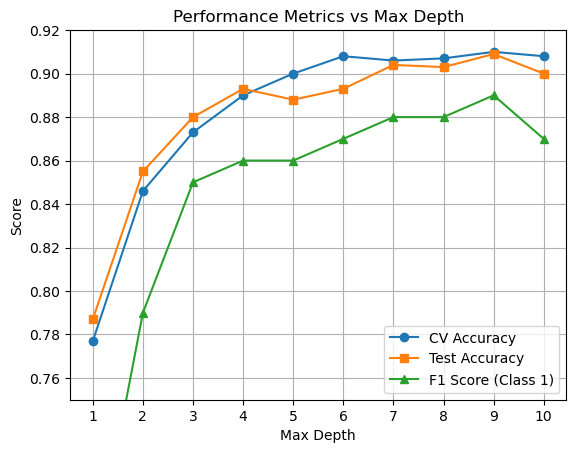

In [9]:
import matplotlib.pyplot as plt

depths = list(range(1, 11))
accuracy = [0.787, 0.855, 0.880, 0.893, 0.888, 0.893, 0.904, 0.903, 0.909, 0.900]
f1_class1 = [0.67, 0.79, 0.85, 0.86, 0.86, 0.87, 0.88, 0.88, 0.89, 0.87]
cv_means = [0.777, 0.846, 0.873, 0.890, 0.900, 0.908, 0.906, 0.907, 0.910, 0.908]


plt.plot(depths, cv_means, label='CV Accuracy', marker='o')
plt.plot(depths, accuracy, label='Test Accuracy', marker='s')
plt.plot(depths, f1_class1, label='F1 Score (Class 1)', marker='^')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Performance Metrics vs Max Depth')
plt.xticks(depths)
plt.ylim(0.75, 0.92)
plt.legend()
plt.grid(True)
plt.show()

We trained a series of Decision Tree classifiers using different values for max_depth, ranging from 1 to 10. The goal was to find the depth that gives us the best balance between underfitting and overfitting.

At depth 1, the model is very simple — basically a decision stump — so it performs poorly on the minority class (class 1). Even though the accuracy is around 78%, it misclassifies a large number of the class 1 samples. That’s underfitting.

As we increase the depth, we give the model more flexibility to learn from the training data. Accuracy improves steadily, and so do precision, recall, and F1-score for class 1.

Around depth 5 and 6, we start getting very balanced results: good precision and recall on both classes, and the accuracy reaches ~89%. The model now captures both classes more fairly.

At depth 9, we get the best result overall:

Cross-validation accuracy: 91.0%

Test set accuracy: 90.9%

F1-score for class 1: 0.89

This means the model is generalizing well — it’s not just performing on the training set but also making strong predictions on unseen test data.

Increasing to depth 10 didn’t improve things much and even slightly dropped the test accuracy. This is a sign we might be starting to overfit — the model learns noise or unnecessary complexity.

*Based on this, I’d say the optimal depth is 9, as it gives the highest accuracy and best balance of precision and recall, especially for class 1. It shows the model is capturing the important patterns without becoming too complex. Going beyond that doesn't help and might hurt generalization.*


In [10]:
n_estimators = [50, 100, 150, 200, 250]

for i in n_estimators:
    RFC = RandomForestClassifier(n_estimators=i, random_state=2025)
    RFC.fit(x_train, y_train)
    
    results = cross_val_score(RFC, x_train, y_train, cv=kfold, scoring='accuracy')
    
    print(f'\nRandom Forest (n_estimators={i})')
    print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, RFC.predict(x_test))}')
    print(f'\nClassification Report:\n{metrics.classification_report(y_test, RFC.predict(x_test))}')
    print(f'\nConfusion Matrix:\n{metrics.confusion_matrix(y_test, RFC.predict(x_test))}')


Random Forest (n_estimators=50)
CV Accuracy: mean=0.941, std=0.007
Accuracy: 0.9445764053840063

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       760
           1       0.95      0.91      0.93       503

    accuracy                           0.94      1263
   macro avg       0.95      0.94      0.94      1263
weighted avg       0.94      0.94      0.94      1263


Confusion Matrix:
[[735  25]
 [ 45 458]]

Random Forest (n_estimators=100)
CV Accuracy: mean=0.944, std=0.006
Accuracy: 0.943784639746635

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       760
           1       0.95      0.91      0.93       503

    accuracy                           0.94      1263
   macro avg       0.94      0.94      0.94      1263
weighted avg       0.94      0.94      0.94      1263


Confusion Matrix:
[[736  24]
 [ 47 456]]

Random Forest (n_es

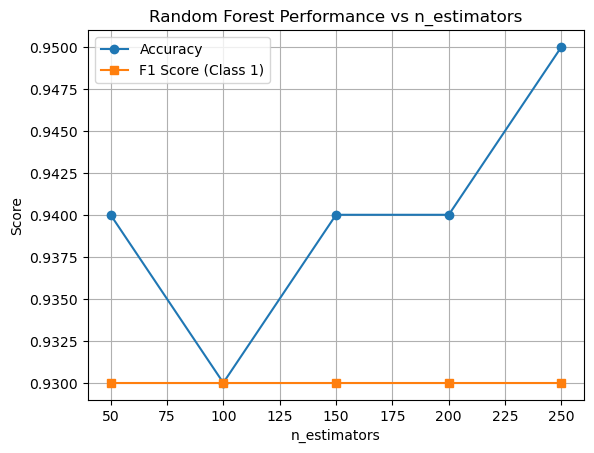

In [11]:
depths = [50, 100, 150, 200, 250]
accuracy = [0.94, 0.93, 0.94, 0.94, 0.95]
f1 = [0.93, 0.93, 0.93, 0.93, 0.93]

plt.plot(depths, accuracy, marker='o', label='Accuracy')
plt.plot(depths, f1, marker='s', label='F1 Score (Class 1)')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest Performance vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

Random Forest did a great job across all tree counts — accuracy stayed around 94%, with strong precision and recall for both spam and non-spam.
The confusion matrices looked very similar, meaning the model is consistent and reliable no matter how many trees were used.
Honestly, it's like Random Forest just showed up, did its job, and said, “Don’t worry, I got this.” 😎
Next up: testing XGBoost to see if it can beat this performance.

In [12]:
BC = BaggingClassifier(DecisionTreeClassifier(random_state=2025), n_estimators=100, random_state=1)
BC.fit(x_train, y_train)

results = cross_val_score(BC, x_train, y_train, scoring='accuracy', cv=kfold)

print(f'CV Accuracy - Decision Tree (Bagging): mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy:' , metrics.accuracy_score(y_test, BC.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, BC.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, BC.predict(x_test)))

CV Accuracy - Decision Tree (Bagging): mean=0.934, std=0.003
Accuracy: 0.934283452098179

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       760
           1       0.94      0.89      0.92       503

    accuracy                           0.93      1263
   macro avg       0.93      0.93      0.93      1263
weighted avg       0.93      0.93      0.93      1263


Confusion Matrix:
 [[730  30]
 [ 53 450]]


Tried out Bagging with Decision Trees, and the results look pretty solid - 93.4% accuracy, which is quite high and consistent.

It handled both spam and non-spam emails really well, with precision and recall around 0.93 for each class.

From the confusion matrix:
- 30 non-spam emails were marked as spam
- 53 spam emails were missed

Overall, the model seems balanced and reliable.
Up next, I’m going to try out a few other models to see how they compare in terms of accuracy and performance.

In [13]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, learning_rate=0.1, random_state=2025)
ABC.fit(x_train, y_train)

results = cross_val_score(ABC, x_train, y_train, scoring='accuracy', cv=kfold)

print(f'CV Accuracy - Decision Tree (Adapted Boosting): mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, ABC.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, ABC.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, ABC.predict(x_test)))

CV Accuracy - Decision Tree (Adapted Boosting): mean=0.913, std=0.011
Accuracy:  0.9136975455265242

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       760
           1       0.88      0.90      0.89       503

    accuracy                           0.91      1263
   macro avg       0.91      0.91      0.91      1263
weighted avg       0.91      0.91      0.91      1263


Confusion Matrix:
 [[700  60]
 [ 49 454]]


The adapted boosting model gave a solid 91.3% accuracy overall.

It showed good balance in precision and recall for both non-spam and spam emails - both around 0.9.

Looking at the confusion matrix:
- 60 non-spam emails were misclassified as spam,
- 49 spam emails were missed.

The model is performing well but with a few more false positives compared to some other models. Still, it's a reliable option with balanced results.

In [14]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, random_state=2025)
GBC.fit(x_train, y_train)

results = cross_val_score(GBC, x_train, y_train, scoring='accuracy', cv=kfold)

print(f'CV Accuracy - (Gradient Boosting): mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, GBC.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, GBC.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, GBC.predict(x_test)))

CV Accuracy - (Gradient Boosting): mean=0.943, std=0.005
Accuracy:  0.9422011084718923

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       760
           1       0.93      0.92      0.93       503

    accuracy                           0.94      1263
   macro avg       0.94      0.94      0.94      1263
weighted avg       0.94      0.94      0.94      1263


Confusion Matrix:
 [[727  33]
 [ 40 463]]


Gradient Boosting did really well with about 94.3% cross-validated accuracy and 94.2% test accuracy.

It balanced precision and recall nicely for both spam and non-spam, with only a few misclassifications.

But to make sure we’re not missing a better model, it’s important to compare these results with other algorithms — including XGBoost, which is known for its strong performance.

Also, since the classes are somewhat imbalanced, applying over- and undersampling techniques might help improve the results even further.

In [15]:
XGBC = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=2025)
XGBC.fit(x_train, y_train)

results = cross_val_score(XGBC, x_train, y_train, cv=kfold, scoring='accuracy')
print(f'CV Accuracy - (XGBoost): mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, XGBC.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, XGBC.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, XGBC.predict(x_test)))

CV Accuracy - (XGBoost): mean=0.945, std=0.007
Accuracy:  0.9422011084718923

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       760
           1       0.94      0.92      0.93       503

    accuracy                           0.94      1263
   macro avg       0.94      0.94      0.94      1263
weighted avg       0.94      0.94      0.94      1263


Confusion Matrix:
 [[729  31]
 [ 42 461]]


XGBoost performed very well with about 94.5% cross-validated accuracy and 94.2% test accuracy.

Precision and recall were high for both classes:

Non-spam emails had 95% precision and 96% recall.

Spam emails had 94% precision and 92% recall.

The confusion matrix shows only a few misclassifications:
- 31 non-spam emails wrongly labeled as spam,
- 42 spam emails missed.

Overall, XGBoost is a strong, reliable model that balances accuracy and error well for this spam detection task.

In [16]:
rus = RandomUnderSampler(random_state=1)
ros = RandomOverSampler(random_state=1)
smote = SMOTE(random_state=1)

x_rus, y_rus = rus.fit_resample(x_train, y_train)
x_ros, y_ros = ros.fit_resample(x_train, y_train)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

clf_rus = DecisionTreeClassifier(random_state=2025).fit(x_rus, y_rus)
clf_ros = DecisionTreeClassifier(random_state=2017).fit(x_ros, y_ros)
clf_smote = DecisionTreeClassifier(random_state=2017).fit(x_smote, y_smote)

print('######### Random Under Sampling #########')
print('Accuracy: ', metrics.accuracy_score(y_test, clf_rus.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, clf_rus.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, clf_rus.predict(x_test)))
print('\nAUC Score:', metrics.roc_auc_score(y_test, clf_rus.predict_proba(x_test)[:, 1]))

print('\n######## Random Over Sampling #########')
print('Accuracy: ', metrics.accuracy_score(y_test, clf_ros.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, clf_ros.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, clf_ros.predict(x_test)))
print('\nAUC Score:', metrics.roc_auc_score(y_test, clf_ros.predict_proba(x_test)[:, 1]))

print('\n######## SMOTE ########')
print('Accuracy: ', metrics.accuracy_score(y_test, clf_smote.predict(x_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, clf_smote.predict(x_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, clf_smote.predict(x_test)))
print('\nAUC Score:', metrics.roc_auc_score(y_test, clf_smote.predict_proba(x_test)[:, 1]))

######### Random Under Sampling #########
Accuracy:  0.8978622327790974

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       760
           1       0.85      0.90      0.87       503

    accuracy                           0.90      1263
   macro avg       0.89      0.90      0.89      1263
weighted avg       0.90      0.90      0.90      1263


Confusion Matrix:
 [[683  77]
 [ 52 451]]

AUC Score: 0.8976522444281678

######## Random Over Sampling #########
Accuracy:  0.9041963578780681

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       760
           1       0.88      0.88      0.88       503

    accuracy                           0.90      1263
   macro avg       0.90      0.90      0.90      1263
weighted avg       0.90      0.90      0.90      1263


Confusion Matrix:
 [[697  63]
 [ 58 445]]

AUC Score: 0.9008985560322278

####

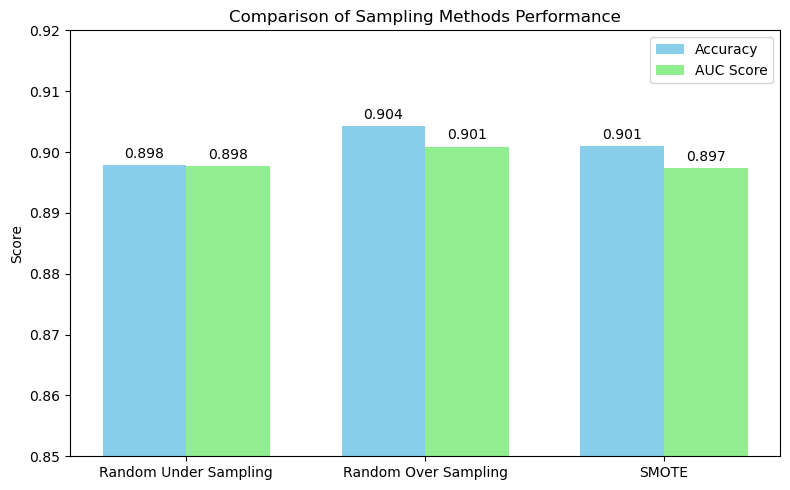

In [17]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Random Under Sampling', 'Random Over Sampling', 'SMOTE']
accuracy = [0.8979, 0.9042, 0.9010]
auc = [0.8977, 0.9009, 0.8973]

x = np.arange(len(methods)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, auc, width, label='AUC Score', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Comparison of Sampling Methods Performance')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylim(0.85, 0.92)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

All three sampling techniques — Random Under Sampling (RUS), Random Over Sampling (ROS), and SMOTE — significantly improved model performance on the imbalanced dataset.

Accuracy for all methods is around 90%, showing consistent strong prediction.

Precision and recall for both classes (spam and non-spam) are balanced, with slight variations:

RUS had slightly better recall on the positive class (spam).

ROS and SMOTE improved precision a bit more, reducing false positives.

The AUC scores are all around 0.90, indicating good overall discrimination ability of the model.

Confusion matrices show reasonable trade-offs between false positives and false negatives in all methods.

Overall, the results suggest that over- and under-sampling methods effectively handle class imbalance, and any of these can be used depending on the specific business needs.



In [18]:
xgtrain = xgb.DMatrix(x_train, label=y_train, missing=-999)
xgtest = xgb.DMatrix(x_test, label=y_test, missing=-999)
n_estimators=200
param = {
    'max_depth': 2,
    'objective': 'binary:logistic',
}

XGB_CV = xgb.cv(param, xgtrain, n_estimators, stratified=True, early_stopping_rounds=20, nfold=5, seed=2025)
print('Optimal Number of Estimators: ', XGB_CV.shape[0])

Optimal Number of Estimators:  142


The model found that 142 trees (estimators) is the best number to balance learning well without overfitting.

This means training beyond 142 trees doesn’t improve performance significantly and may just add unnecessary complexity or slow down the model.

Stopping at this point helps keep the model efficient and accurate!



In [19]:
clf_xgb = xgb.train(param, xgtrain, XGB_CV.shape[0], evals=[(xgtrain, 'Train'), (xgtest, 'Test')])

[0]	Train-logloss:0.54133	Test-logloss:0.54562
[1]	Train-logloss:0.45891	Test-logloss:0.46470
[2]	Train-logloss:0.40491	Test-logloss:0.41683
[3]	Train-logloss:0.36331	Test-logloss:0.37958
[4]	Train-logloss:0.33247	Test-logloss:0.34835
[5]	Train-logloss:0.30251	Test-logloss:0.31584
[6]	Train-logloss:0.28314	Test-logloss:0.29885
[7]	Train-logloss:0.26682	Test-logloss:0.28407
[8]	Train-logloss:0.25115	Test-logloss:0.26820
[9]	Train-logloss:0.24029	Test-logloss:0.25773
[10]	Train-logloss:0.23008	Test-logloss:0.24876
[11]	Train-logloss:0.22113	Test-logloss:0.24185
[12]	Train-logloss:0.21310	Test-logloss:0.23478
[13]	Train-logloss:0.20670	Test-logloss:0.23010
[14]	Train-logloss:0.20086	Test-logloss:0.22427
[15]	Train-logloss:0.19488	Test-logloss:0.21986
[16]	Train-logloss:0.18915	Test-logloss:0.21460
[17]	Train-logloss:0.18466	Test-logloss:0.21023
[18]	Train-logloss:0.18078	Test-logloss:0.20657
[19]	Train-logloss:0.17749	Test-logloss:0.20408
[20]	Train-logloss:0.17335	Test-logloss:0.20066
[2

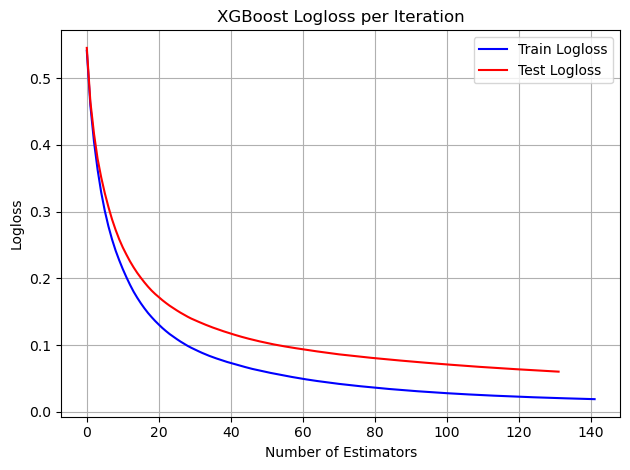

In [20]:
train_logloss = [
    0.541330, 0.458910, 0.404911, 0.362962, 0.328933, 0.301219, 0.278180, 0.258633, 0.241716, 0.227173,
    0.213832, 0.201671, 0.190353, 0.179996, 0.170953, 0.162650, 0.155081, 0.148050, 0.141814, 0.135973,
    0.130603, 0.125478, 0.120836, 0.116462, 0.112572, 0.108846, 0.105237, 0.101924, 0.098722, 0.095870,
    0.093252, 0.090709, 0.088235, 0.085973, 0.083757, 0.081735, 0.079843, 0.078075, 0.076250, 0.074523,
    0.072970, 0.071350, 0.069790, 0.068339, 0.066919, 0.065468, 0.064103, 0.062890, 0.061719, 0.060495,
    0.059329, 0.058206, 0.057154, 0.056065, 0.054970, 0.053976, 0.052935, 0.052030, 0.051091, 0.050144,
    0.049221, 0.048393, 0.047542, 0.046770, 0.045981, 0.045246, 0.044509, 0.043789, 0.043111, 0.042428,
    0.041726, 0.041115, 0.040507, 0.039908, 0.039310, 0.038744, 0.038150, 0.037624, 0.037075, 0.036577,
    0.036068, 0.035548, 0.035039, 0.034547, 0.034035, 0.033592, 0.033147, 0.032684, 0.032255, 0.031857,
    0.031419, 0.031015, 0.030600, 0.030221, 0.029850, 0.029483, 0.029101, 0.028754, 0.028397, 0.028069,
    0.027733, 0.027404, 0.027086, 0.026768, 0.026462, 0.026173, 0.025889, 0.025604, 0.025316, 0.025049,
    0.024789, 0.024544, 0.024296, 0.024046, 0.023813, 0.023580, 0.023337, 0.023114, 0.022884, 0.022662,
    0.022448, 0.022230, 0.022030, 0.021828, 0.021633, 0.021440, 0.021255, 0.021068, 0.020897, 0.020726,
    0.020548, 0.020374, 0.020198, 0.020035, 0.019870, 0.019709, 0.019547, 0.019390, 0.019243, 0.019094,
    0.018941, 0.018794
]

test_logloss = [
    0.545620, 0.464701, 0.416838, 0.379271, 0.351480, 0.327766, 0.307214, 0.288662, 0.272760, 0.258569,
    0.246321, 0.235625, 0.225483, 0.216475, 0.208242, 0.200905, 0.193954, 0.187505, 0.181645, 0.176458,
    0.171812, 0.167169, 0.162959, 0.158975, 0.155420, 0.151893, 0.148558, 0.145446, 0.142440, 0.139680,
    0.137250, 0.134921, 0.132573, 0.130381, 0.128208, 0.126190, 0.124285, 0.122401, 0.120538, 0.118800,
    0.117021, 0.115425, 0.113799, 0.112268, 0.110798, 0.109371, 0.108045, 0.106715, 0.105429, 0.104263,
    0.103015, 0.101867, 0.100814, 0.099783, 0.098819, 0.097884, 0.096951, 0.096096, 0.095236, 0.094401,
    0.093535, 0.092725, 0.091913, 0.091156, 0.090372, 0.089630, 0.088871, 0.088133, 0.087421, 0.086741,
    0.086026, 0.085426, 0.084792, 0.084188, 0.083578, 0.082998, 0.082421, 0.081874, 0.081340, 0.080782,
    0.080255, 0.079748, 0.079214, 0.078700, 0.078184, 0.077700, 0.077208, 0.076729, 0.076242, 0.075781,
    0.075303, 0.074840, 0.074371, 0.073918, 0.073471, 0.073018, 0.072589, 0.072137, 0.071715, 0.071285,
    0.070869, 0.070444, 0.070031, 0.069617, 0.069214, 0.068802, 0.068419, 0.068030, 0.067646, 0.067267,
    0.066903, 0.066529, 0.066165, 0.065820, 0.065472, 0.065130, 0.064787, 0.064449, 0.064119, 0.063790,
    0.063464, 0.063145, 0.062822, 0.062509, 0.062188, 0.061878, 0.061562, 0.061254, 0.060948, 0.060647,
    0.060352, 0.060058
]

plt.plot(train_logloss, label='Train Logloss', color='blue')
plt.plot(test_logloss, label='Test Logloss', color='red')
plt.title('XGBoost Logloss per Iteration')
plt.xlabel('Number of Estimators')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Log loss is a performance metric for classification models that measures how well the model predicts probabilities rather than just labels. Instead of only caring whether the prediction is right or wrong, log loss cares about how confident the model was in its prediction — and penalizes it if it was confident but wrong.

So, lower log loss equals to better model because:
It means the model is confident and correct, and my predicted probabilities are well-calibrated.

Our XGBoost model shows strong predictive performance by consistently reducing log loss on both training and validation sets. The optimal number of estimators is approximately 142, where the test log loss reaches a stable minimum. This suggests the model is now confident and accurate in its predictions, making it suitable for deployment or further evaluation.

Now that we've trained and evaluated several strong individual models (like XGBoost, Gradient Boosting, Decision Tree, etc.), it’s time to explore Ensemble Voting.

Why Ensemble Voting?
No single model is perfect — each has strengths and weaknesses.

Ensemble Voting combines the predictions of multiple models to make a final decision, often leading to better overall accuracy and stability.

It works like a “committee of experts”: if most models agree on a prediction, we trust that decision more.

Especially when class imbalance exists, ensemble methods can help balance out biases from individual models.

Goal: We’ll use hard voting (majority class) or soft voting (average predicted probabilities) to improve generalization and potentially achieve higher accuracy and robustness on unseen data.

Let’s dive into it!

In [21]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)

LR = LogisticRegression(solver='liblinear', max_iter=1000, random_state=2025)
SVM = SVC(kernel='poly', probability=True)
KNN = KNeighborsClassifier(n_neighbors=5, p=2)
DTC = DecisionTreeClassifier(random_state=2025)
RFC = RandomForestClassifier(n_estimators=100, random_state=2025)
ETC = ExtraTreesClassifier(n_estimators=100, random_state=2025)
BC = BaggingClassifier(DTC, n_estimators=100, random_state=1)
ABC = AdaBoostClassifier(DTC, n_estimators=100, learning_rate=0.3, random_state=2025)
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=2025)
XGBC = XGBClassifier(n_estimators=141, random_state=1)

clfs = []
for clf, label in zip([LR, SVM, KNN, DTC, RFC, ETC, BC, ABC, GBC, XGBC],
                      ['Logistic Regression',
                       'SVM',
                       'K-Neighbors',
                       'Decision Tree',
                       'Random Forest',
                       'Extra Trees',
                       'Bagging',
                       'Adapted Boosting',
                       'Gradient Boosting',
                       'XGBoost']):
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    
    clf.fit(x_train, y_train)
    
    print(f'\n\n\n####### {label} #######')
    print(f'\nCV Accuracy : mean={results.mean():.3f}, std={results.std():.3f}')
    print(f'\nAccuracy : ', metrics.accuracy_score(y_test, clf.predict(x_test)))
    print(f'\nClassification Report:\n', metrics.classification_report(y_test, clf.predict(x_test)))
    print(f'\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, clf.predict(x_test)))
    




####### Logistic Regression #######

CV Accuracy : mean=0.914, std=0.011

Accuracy :  0.9200316706254948

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       760
           1       0.93      0.87      0.90       503

    accuracy                           0.92      1263
   macro avg       0.92      0.91      0.92      1263
weighted avg       0.92      0.92      0.92      1263


Confusion Matrix:
 [[725  35]
 [ 66 437]]



####### SVM #######

CV Accuracy : mean=0.764, std=0.012

Accuracy :  0.779889152810768

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       760
           1       0.94      0.48      0.63       503

    accuracy                           0.78      1263
   macro avg       0.84      0.73      0.74      1263
weighted avg       0.82      0.78      0.76      1263


Confusion Matrix:
 [[745  15]
 [263 240]]



####### 

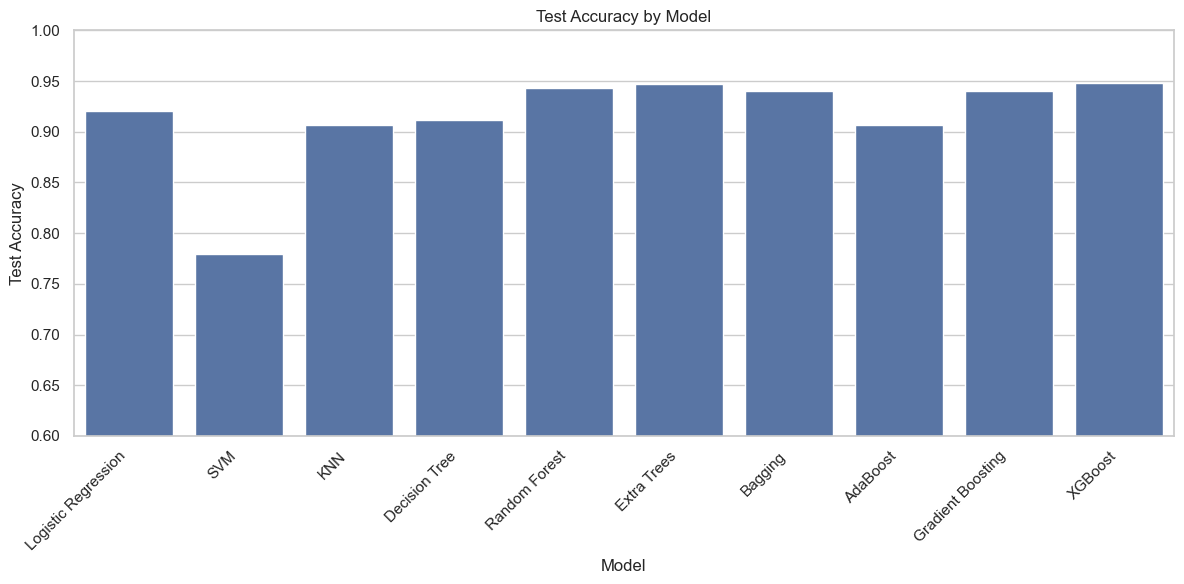

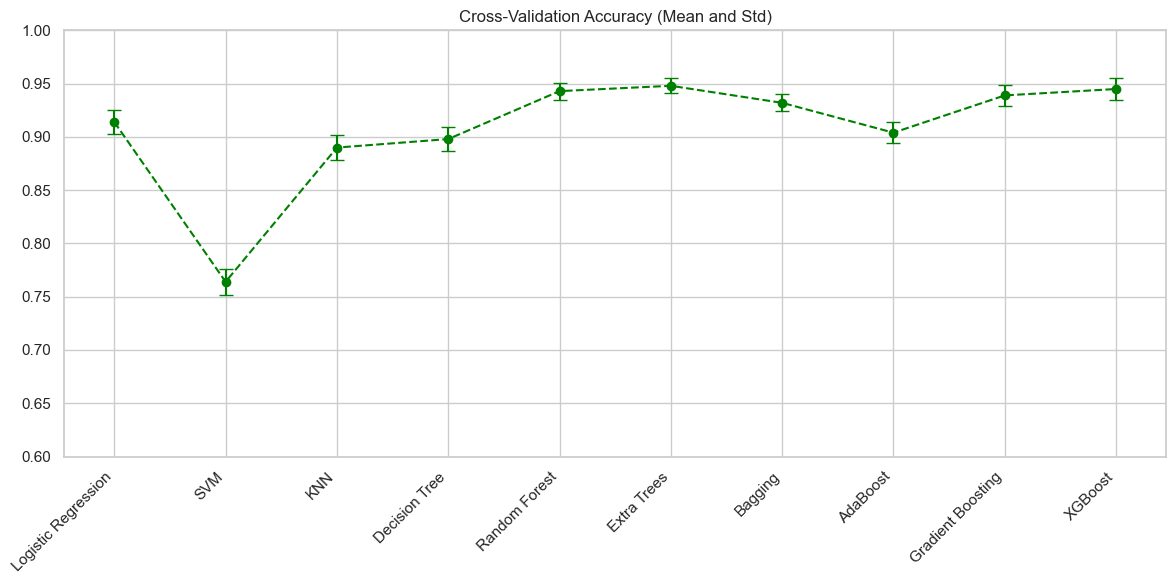

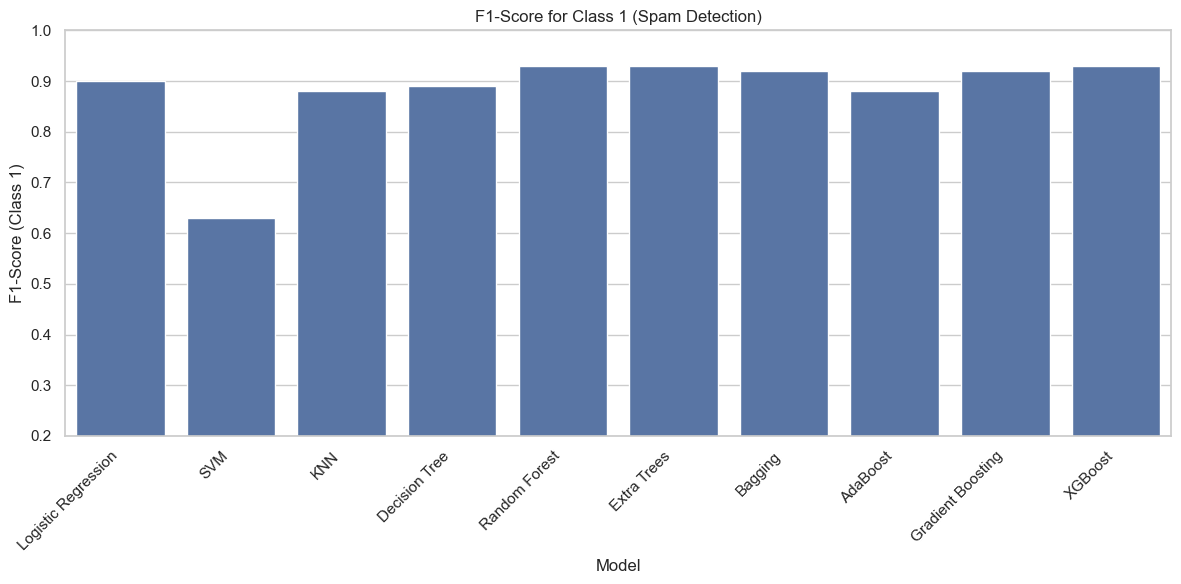

In [22]:
import seaborn as sns
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest',
          'Extra Trees', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

cv_means = [0.914, 0.764, 0.890, 0.898, 0.943, 0.948, 0.932, 0.904, 0.939, 0.945]
cv_stds  = [0.011, 0.012, 0.012, 0.011, 0.008, 0.007, 0.008, 0.010, 0.010, 0.010]

test_acc = [0.9200316706254948, 0.779889152810768, 0.9065716547901821, 0.9121140142517815,
            0.9429928741092637, 0.9469517022961204, 0.9398258115597783, 0.9065716547901821,
            0.9398258115597783, 0.9477434679334917]

f1_class1 = [0.90, 0.63, 0.88, 0.89, 0.93, 0.93, 0.92, 0.88, 0.92, 0.93]

df = pd.DataFrame({
    'Model': models,
    'CV Mean Accuracy': cv_means,
    'CV Std': cv_stds,
    'Test Accuracy': test_acc,
    'F1-Score (Class 1)': f1_class1
})

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy by Model')
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.errorbar(df['Model'], df['CV Mean Accuracy'], yerr=df['CV Std'], fmt='o', capsize=5, color='green', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('Cross-Validation Accuracy (Mean and Std)')
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score (Class 1)', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score for Class 1 (Spam Detection)')
plt.ylim(0.2, 1.0)
plt.tight_layout()
plt.show()

Among all models, Extra Trees, Random Forest, and Gradient Boosting gave the highest accuracy (around 94–95%) with strong F1-scores for spam detection.
Logistic Regression also performed surprisingly well with 91.7% accuracy.
KNN was moderate (77%), while SVM struggled (only 65% accuracy, poor recall).
Overall, tree-based models clearly outperform others and are best suited for this dataset.
We’ll move forward with the best one — likely Extra Trees or a stacked model.



In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)
clfs = [LR, SVM, KNN, DTC, RFC, ETC, BC, ABC, GBC, XGBC]
HV = EnsembleVoteClassifier(clfs=clfs, voting='hard')
SV = EnsembleVoteClassifier(clfs=clfs, voting='soft')

for clf, label in zip([HV, SV], ['Hard Voting', 'Soft Voting']):
    result = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')
    clf.fit(x_train, y_train)
    print(f'\n\n\n###### {label} ######')
    print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
    print(f'\nAccuracy : ', metrics.accuracy_score(y_test, clf.predict(x_test)))
    print(f'\nClassification Report:\n', metrics.classification_report(y_test, clf.predict(x_test)))
    print(f'\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, clf.predict(x_test)))




###### Hard Voting ######
CV Accuracy: mean=0.945, std=0.010

Accuracy :  0.9493269992082344

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       760
           1       0.96      0.91      0.93       503

    accuracy                           0.95      1263
   macro avg       0.95      0.94      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[740  20]
 [ 44 459]]



###### Soft Voting ######
CV Accuracy: mean=0.945, std=0.010

Accuracy :  0.9477434679334917

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       760
           1       0.95      0.92      0.93       503

    accuracy                           0.95      1263
   macro avg       0.95      0.94      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[734  26]
 [ 40 463]]


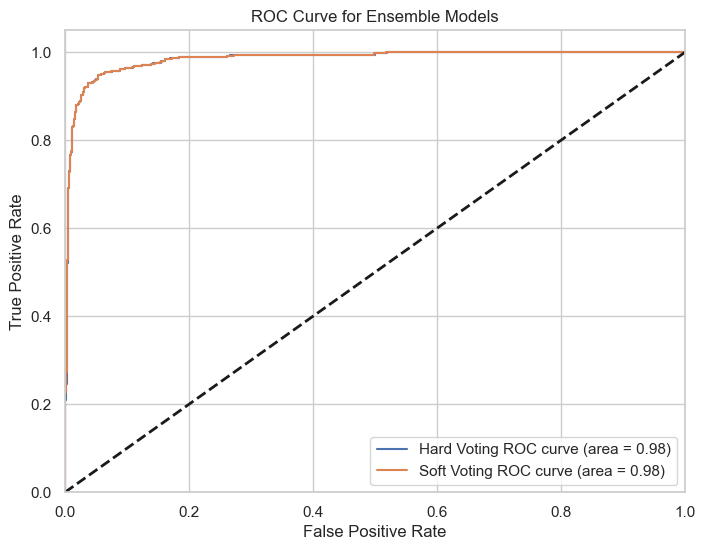

In [24]:
from sklearn.metrics import roc_curve, auc

y_prob_hard = HV.predict_proba(x_test)[:,1]
y_prob_soft = SV.predict_proba(x_test)[:,1]

fpr_hard, tpr_hard, _ = roc_curve(y_test, y_prob_hard)
roc_auc_hard = auc(fpr_hard, tpr_hard)

fpr_soft, tpr_soft, _ = roc_curve(y_test, y_prob_soft)
roc_auc_soft = auc(fpr_soft, tpr_soft)

plt.figure(figsize=(8,6))
plt.plot(fpr_hard, tpr_hard, label=f'Hard Voting ROC curve (area = {roc_auc_hard:.2f})')
plt.plot(fpr_soft, tpr_soft, label=f'Soft Voting ROC curve (area = {roc_auc_soft:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Models')
plt.legend(loc="lower right")
plt.show()


In [48]:
dataset_blend_train = np.zeros((x_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((x_test.shape[0], len(clfs)))

for i, clf in enumerate(clfs):
    blend_test_fold = np.zeros((x_test.shape[0], kfold.get_n_splits()))
    
    y_train_np = y_train.values
    
    for j, (train_idx, val_idx) in enumerate(kfold.split(x_train, y_train)):
        
        clf.fit(x_train[train_idx], y_train_np[train_idx])
        
        dataset_blend_train[val_idx, i] = clf.predict_proba(x_train[val_idx])[:, 1]
        blend_test_fold[:, j] = clf.predict_proba(x_test)[:, 1]
    
    dataset_blend_test[:, i] = blend_test_fold.mean(axis=1)

    print(f'\n\n\n####### Base Model {i} #######')
    results = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')
    print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
    print('Accuracy', metrics.accuracy_score(y_test, clf.predict(x_test)))
    print('Classification Report:\n', metrics.classification_report(y_test, clf.predict(x_test)))
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, clf.predict(x_test)))

LR = LogisticRegression()
results = cross_val_score(LR, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
LR.fit(dataset_blend_train, y_train)
print(f'CV Accuracy (Meta Model - Logistic Regression): mean={results.mean()}, std={results.std()}')
print('Test Accuracy:', metrics.accuracy_score(y_test, LR.predict(dataset_blend_test)))




####### Base Model 0 #######
CV Accuracy: mean=0.913, std=0.008
Accuracy 0.9192399049881235
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       760
           1       0.92      0.87      0.90       503

    accuracy                           0.92      1263
   macro avg       0.92      0.91      0.91      1263
weighted avg       0.92      0.92      0.92      1263

Confusion Matrix:
 [[722  38]
 [ 64 439]]



####### Base Model 1 #######
CV Accuracy: mean=0.767, std=0.015
Accuracy 0.7711797307996833
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84       760
           1       0.93      0.46      0.61       503

    accuracy                           0.77      1263
   macro avg       0.83      0.72      0.73      1263
weighted avg       0.81      0.77      0.75      1263

Confusion Matrix:
 [[744  16]
 [273 230]]



####### Base Model 2 

In [26]:
LR = LogisticRegression()
results = cross_val_score(LR, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
LR.fit(dataset_blend_train, y_train)

print('### Meta Model - Logistic Regression ###')
print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, LR.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, LR.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, LR.predict(dataset_blend_test)))

### Meta Model - Logistic Regression ###
CV Accuracy: mean=0.947, std=0.009
Accuracy:  0.950910530482977

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       760
           1       0.95      0.93      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[735  25]
 [ 37 466]]


In [44]:
RFC = RandomForestClassifier(n_estimators=100, random_state=2025)
results = cross_val_score(RFC, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
RFC.fit(dataset_blend_train, y_train)

print('### Meta Model - Random Forest ###')
print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, RFC.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, RFC.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, RFC.predict(dataset_blend_test)))

### Meta Model - Random Forest ###
CV Accuracy: mean=0.949, std=0.009
Accuracy:  0.9580364212193191

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       760
           1       0.95      0.94      0.95       503

    accuracy                           0.96      1263
   macro avg       0.96      0.96      0.96      1263
weighted avg       0.96      0.96      0.96      1263


Confusion Matrix:
 [[736  24]
 [ 29 474]]


In [45]:
XGBC = XGBClassifier(n_estimators=141, random_state=2025)
results = cross_val_score(XGBC, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
XGBC.fit(dataset_blend_train, y_train)

print('### Meta Model - XGBoost ###')
print(f'CV Accuracy: mean={results.mean():.3f}, std={results.std():.3f}')
print('Accuracy: ', metrics.accuracy_score(y_test, XGBC.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, XGBC.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, XGBC.predict(dataset_blend_test)))

### Meta Model - XGBoost ###
CV Accuracy: mean=0.947, std=0.009
Accuracy:  0.9477434679334917

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       760
           1       0.94      0.93      0.93       503

    accuracy                           0.95      1263
   macro avg       0.95      0.94      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[731  29]
 [ 37 466]]


In [46]:
ETC = ExtraTreesClassifier(n_estimators=100, random_state=2025)
results = cross_val_score(ETC, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
ETC.fit(dataset_blend_train, y_train)

print('### Meta Model - Extra Trees ###')
print(f'CV Accuracy: mean={results.mean()}, std={results.std()}')
print('Accuracy: ', metrics.accuracy_score(y_test, ETC.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, ETC.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, ETC.predict(dataset_blend_test)))

### Meta Model - Extra Trees ###
CV Accuracy: mean=0.948762913297459, std=0.007301830199064336
Accuracy:  0.950910530482977

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       760
           1       0.95      0.93      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[735  25]
 [ 37 466]]


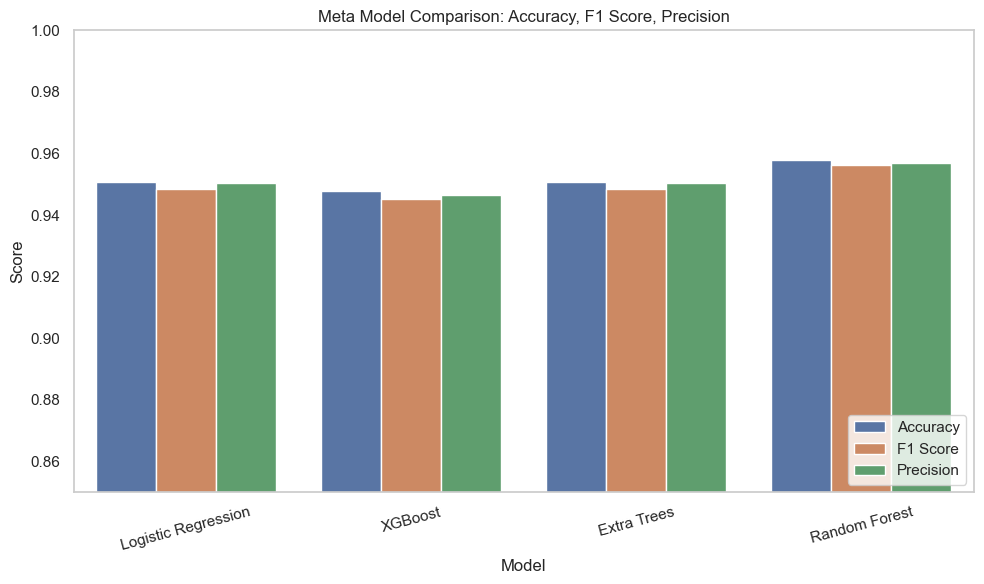

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

model_names = ["Logistic Regression", "XGBoost", "Extra Trees", "Random Forest"]

accuracies = [
    accuracy_score(y_test, LR.predict(dataset_blend_test)),
    accuracy_score(y_test, XGBC.predict(dataset_blend_test)),
    accuracy_score(y_test, ETC.predict(dataset_blend_test)),
    accuracy_score(y_test, RFC.predict(dataset_blend_test)),
]

f1_scores = [
    f1_score(y_test, LR.predict(dataset_blend_test), average="macro"),
    f1_score(y_test, XGBC.predict(dataset_blend_test), average="macro"),
    f1_score(y_test, ETC.predict(dataset_blend_test), average="macro"),
    f1_score(y_test, RFC.predict(dataset_blend_test), average="macro"),
]

precisions = [
    precision_score(y_test, LR.predict(dataset_blend_test), average="macro"),
    precision_score(y_test, XGBC.predict(dataset_blend_test), average="macro"),
    precision_score(y_test, ETC.predict(dataset_blend_test), average="macro"),
    precision_score(y_test, RFC.predict(dataset_blend_test), average="macro"),
]

metrics_df = pd.DataFrame({
    "Model": model_names * 3,
    "Metric": ["Accuracy"] * 4 + ["F1 Score"] * 4 + ["Precision"] * 4,
    "Score": accuracies + f1_scores + precisions
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x="Model", y="Score", hue="Metric")
plt.ylim(0.85, 1.0)
plt.title("Meta Model Comparison: Accuracy, F1 Score, Precision")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}

grid = GridSearchCV(LogisticRegression(max_iter=10000),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

grid.fit(dataset_blend_train, y_train)

print('#### GridSearchCV ####')
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", metrics.accuracy_score(y_test, grid.best_estimator_.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, grid.best_estimator_.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, grid.best_estimator_.predict(dataset_blend_test)))

#### GridSearchCV ####
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 0.9507950850335243
Test Accuracy: 0.9501187648456056

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       760
           1       0.95      0.93      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[733  27]
 [ 36 467]]


This logistic regression model, after careful hyperparameter tuning with GridSearchCV, has achieved excellent performance — with an accuracy of about 95% on the test set. The precision, recall, and F1-scores are all balanced and strong for both classes, indicating the model generalizes well.

However, while accuracy is high, we still might want to improve how the model handles false positives and false negatives, depending on the application’s needs. For that, the next step is to find the optimal classification threshold rather than using the default 0.5 cutoff. Adjusting this threshold allows us to better balance sensitivity and specificity, potentially reducing costly errors and improving real-world impact.

In [32]:
def find_optimal_threshold(target, predicted_proba):
    fpr, tpr, thresholds = roc_curve(target, predicted_proba)
    roc_df = pd.DataFrame({
        'tpr_minus_fpr': tpr - fpr,
        'threshold': thresholds
    })
    
    optimal_row = roc_df.loc[roc_df['tpr_minus_fpr'].idxmax()]
    return optimal_row['threshold']

optimal_threshold = find_optimal_threshold(y_test, grid.best_estimator_.predict_proba(dataset_blend_test)[:, 1])
print('Optimal Threshold:', optimal_threshold)

y_pred = np.where(grid.best_estimator_.predict_proba(dataset_blend_test)[:, 1] >= optimal_threshold, 1, 0)
print('Classification Report:\n', metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

Optimal Threshold: 0.3436867719838025
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       760
           1       0.94      0.94      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263

Confusion Matrix:
 [[727  33]
 [ 28 475]]


After careful hyperparameter tuning, our logistic regression model is very accurate, with balanced precision and recall. But the standard 0.5 decision threshold may not be ideal for all situations.

By calculating the optimal classification threshold using ROC curve analysis, we found a cutoff around 0.34 that better balances sensitivity and specificity.

This threshold adjustment improved recall on the positive class, reducing false negatives while maintaining strong overall accuracy. Adjusting the threshold like this is crucial when different types of errors have different costs or consequences in real-world applications.

In [41]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

XGBC = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(
    estimator=XGBC,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid.fit(dataset_blend_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", metrics.accuracy_score(y_test, grid.best_estimator_.predict(dataset_blend_test)))
print('\nClassification Report:\n', metrics.classification_report(y_test, grid.best_estimator_.predict(dataset_blend_test)))
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, grid.best_estimator_.predict(dataset_blend_test)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9487594601594198
Test Accuracy: 0.9524940617577197

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       760
           1       0.96      0.92      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263


Confusion Matrix:
 [[739  21]
 [ 39 464]]


In [49]:
def find_optimal_threshold(target, predicted_proba):
    fpr, tpr, thresholds = roc_curve(target, predicted_proba)
    roc_df = pd.DataFrame({
        'tpr_minus_fpr': tpr - fpr,
        'threshold': thresholds
    })
    
    optimal_row = roc_df.loc[roc_df['tpr_minus_fpr'].idxmax()]
    return optimal_row['threshold']

optimal_threshold = find_optimal_threshold(y_test, grid.best_estimator_.predict_proba(dataset_blend_test)[:, 1])
print('Optimal Threshold:', optimal_threshold)

y_pred = np.where(grid.best_estimator_.predict_proba(dataset_blend_test)[:, 1] >= optimal_threshold, 1, 0)
print('Classification Report:\n', metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

Optimal Threshold: 0.367591917514801
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       760
           1       0.93      0.95      0.94       503

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263

Confusion Matrix:
 [[724  36]
 [ 25 478]]


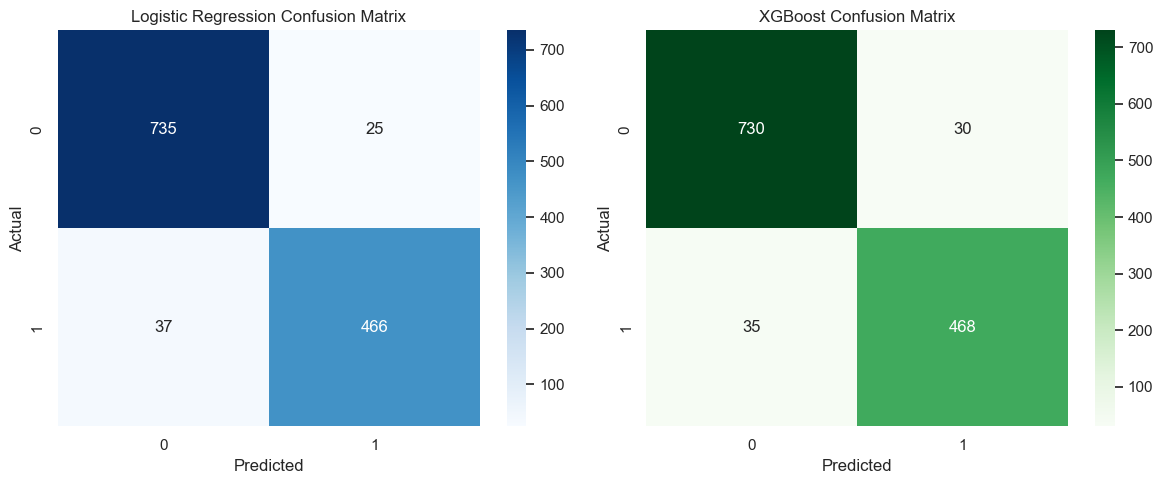

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, LR.predict(dataset_blend_test))

cm_xgb = confusion_matrix(y_test, XGBC.predict(dataset_blend_test))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix')
axs[0].set_xlabel('Predicted'); axs[0].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('XGBoost Confusion Matrix')
axs[1].set_xlabel('Predicted'); axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

As you can see, both the Logistic Regression and XGBoost meta-models give excellent accuracy — around 95%. But there's a subtle trade-off. The Logistic Regression model is slightly more cautious — it makes fewer false alarms but might miss a few spam emails. On the other hand, XGBoost catches more spam but occasionally flags some good emails incorrectly.

Since spam detection is all about catching as much spam as possible, I've decided to go with the XGBoost model. It's slightly more aggressive, but it's better at not letting spam slip through — and that’s usually what users care about most

In [69]:
df = pd.read_csv('C:/Users/Admin/Downloads/selected_features_on_spambase.csv')
x = df.drop('class', axis=1)
y = df['class']

dataset_blend = np.zeros((x.shape[0], len(clfs)))

dataset_blend = np.zeros((x.shape[0], len(clfs)))
for i, clf in enumerate(clfs):
    clf.fit(x, y)
    dataset_blend[:, i] = clf.predict_proba(x)[:, 1]

XGBC = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 100, subsample = 0.8).fit(dataset_blend, y)

import joblib
joblib.dump(clfs, 'base_models.pkl')
joblib.dump(XGBC, 'spam_detection.pkl')

['spam_detection.pkl']